In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Setup Environment

In [ ]:
"""Install NSL package"""
!pip install --upgrade neural_structured_learning

     |████████████████████████████████| 122kB 8.5MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from neural_structured_learning.tools import graph_utils
import neural_structured_learning as nsl
import tensorflow_addons as tfa
from copy import deepcopy
import random
import os
import PIL
import time

tf.keras.backend.clear_session()
print("Version: ", tf.__version__)
print("keras", tf.keras.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.0
keras 2.4.0
Eager mode:  True
GPU is available


# 2.Generate AD Image Tfr files

In [ ]:
from graph_data_processing import GraphDataProcess

In [ ]:
''' label definition: NonDemented - 0, VeryMildDemented - 1, MildDemented -2, ModerateDemented -3 '''
label_list = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
root_path = '/content/drive/My Drive/Projects/codes/graph_images/'

'''rename images in the graph_image folder'''
# GraphDataProcess.rename_images(label_list, root_path) 

'''count each label images'''
NUM=[]
for label in label_list: NUM.append(len(os.listdir(f'{root_path}{label}/')))
NUM

[3210, 2240, 896, 64]

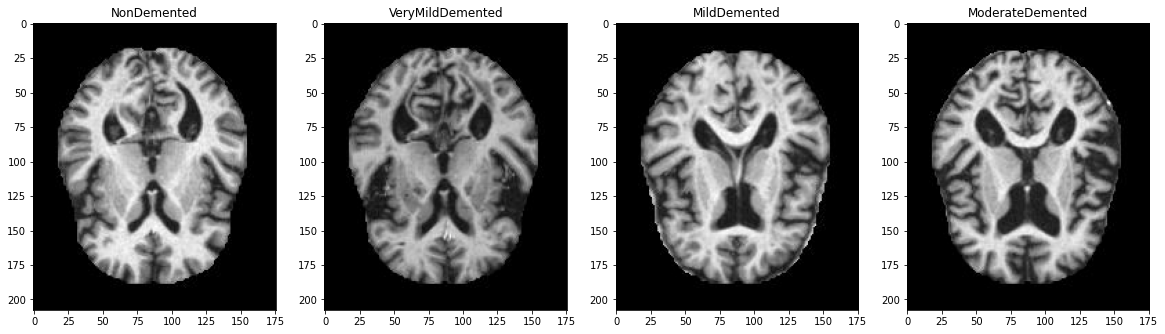

In [ ]:
'''label image plotting'''
plt.figure(figsize=(20,20))
for index, label in enumerate(label_list):
#     image = tf.keras.preprocessing.image.load_img(path=f'{root_path}{label_list[index]}/{index}_0.jpg', color_mode='rgb', target_size= (208,176),interpolation='nearest')
#     tensor = tf.keras.preprocessing.image.img_to_array(image)
    image_string = open(f'{root_path}{label_list[index]}/{index}_0.jpg', 'rb').read()
    image_tensor = tf.io.decode_jpeg(contents=image_string, channels=3, name=None)
    image_tensor = tf.image.resize(image_tensor, size=(208,176))
    ax = plt.subplot(1, 4, index + 1)
    plt.imshow(image_tensor/255)
    plt.title(label_list[index])

In [ ]:
'''Generate image tfr files'''
path_list = [f'{root_path}{label}/' for label in label_list]
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
# GraphDataProcess.generate_tfr_raw(path_list=path_list, tfr_list=tfr_list) 

In [ ]:
'''Parse image tfr files to image_tensor with size at 100*100 and 3 channels'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=20, 
                                                           size=(100,100),
                                                           channels=3,
                                                           shuffle=True)
dt = iter(image_dataset).get_next()
dt

{'id': <tf.Tensor: shape=(20,), dtype=string, numpy=
 array([b'0_2634.jpg', b'0_1394.jpg', b'0_2232.jpg', b'0_2352.jpg',
        b'0_360.jpg', b'0_2129.jpg', b'0_2059.jpg', b'0_3013.jpg',
        b'0_2878.jpg', b'0_1737.jpg', b'0_291.jpg', b'0_381.jpg',
        b'0_2335.jpg', b'0_2904.jpg', b'0_2365.jpg', b'0_2577.jpg',
        b'0_633.jpg', b'0_2865.jpg', b'0_2779.jpg', b'0_2677.jpg'],
       dtype=object)>,
 'image_tensor': <tf.Tensor: shape=(20, 100, 100, 3), dtype=float32, numpy=
 array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         

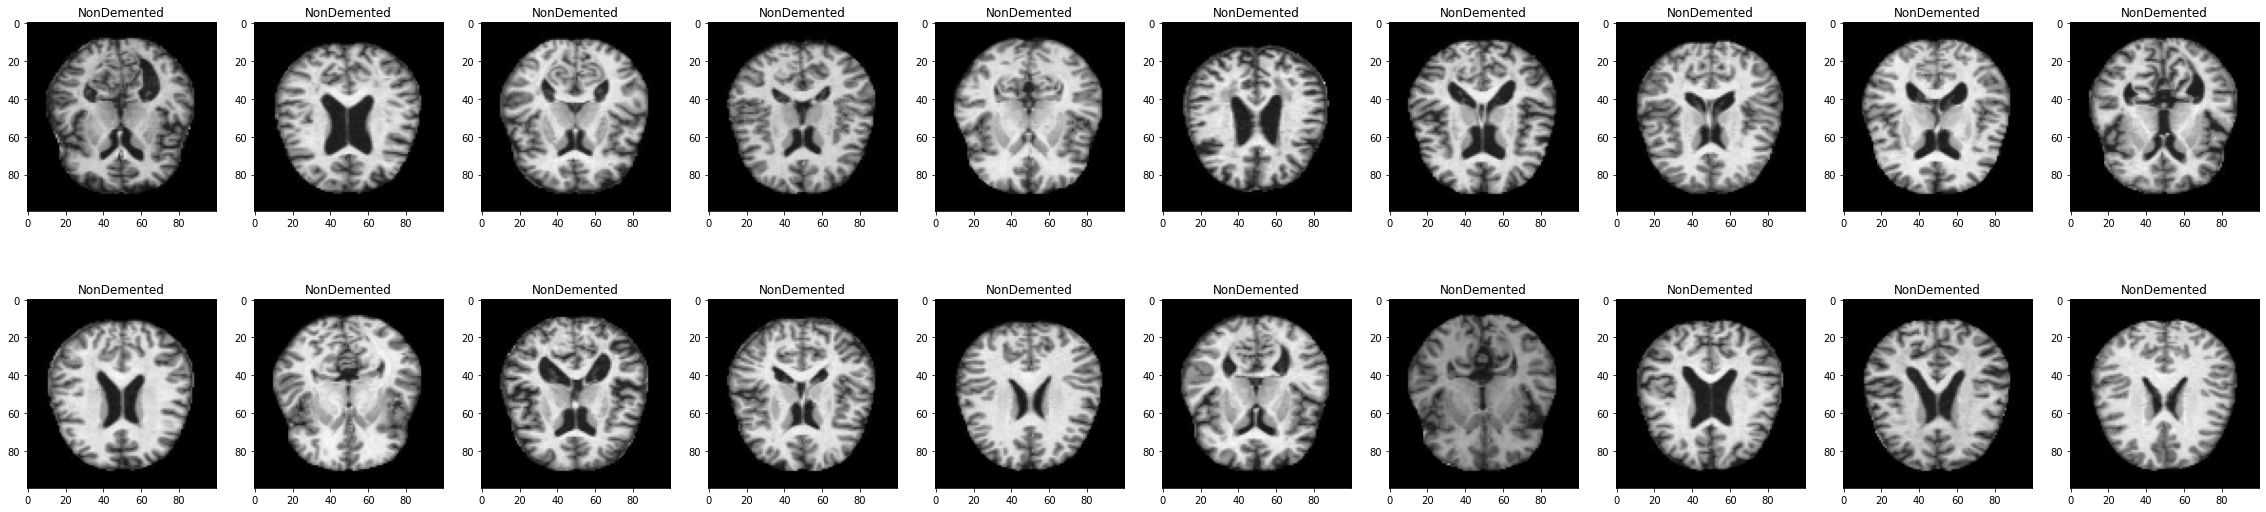

In [ ]:
'''Plot parsed image tensors with size at 100 * 100 and 3 channels'''
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(dt['image_tensor']):
    ax = plt.subplot(10, 10, img_index + 1)
    plt.imshow(img_tensor)
    plt.title(label_list[dt['label'].numpy()[img_index]])

In [ ]:
'''Parse image tfr files to image_tensor with size at 100 * 100 and 1 channel'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=20, 
                                                           size=(100,100),
                                                           channels=1,
                                                           shuffle=True)
dt = iter(image_dataset).get_next()
dt

{'id': <tf.Tensor: shape=(20,), dtype=string, numpy=
 array([b'0_1967.jpg', b'0_1328.jpg', b'0_2041.jpg', b'0_1924.jpg',
        b'0_981.jpg', b'0_2693.jpg', b'0_564.jpg', b'0_1776.jpg',
        b'0_1612.jpg', b'0_1518.jpg', b'0_1980.jpg', b'0_1236.jpg',
        b'0_1363.jpg', b'0_38.jpg', b'0_2692.jpg', b'0_324.jpg',
        b'0_1742.jpg', b'0_1154.jpg', b'0_696.jpg', b'0_249.jpg'],
       dtype=object)>,
 'image_tensor': <tf.Tensor: shape=(20, 100, 100, 1), dtype=float32, numpy=
 array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          

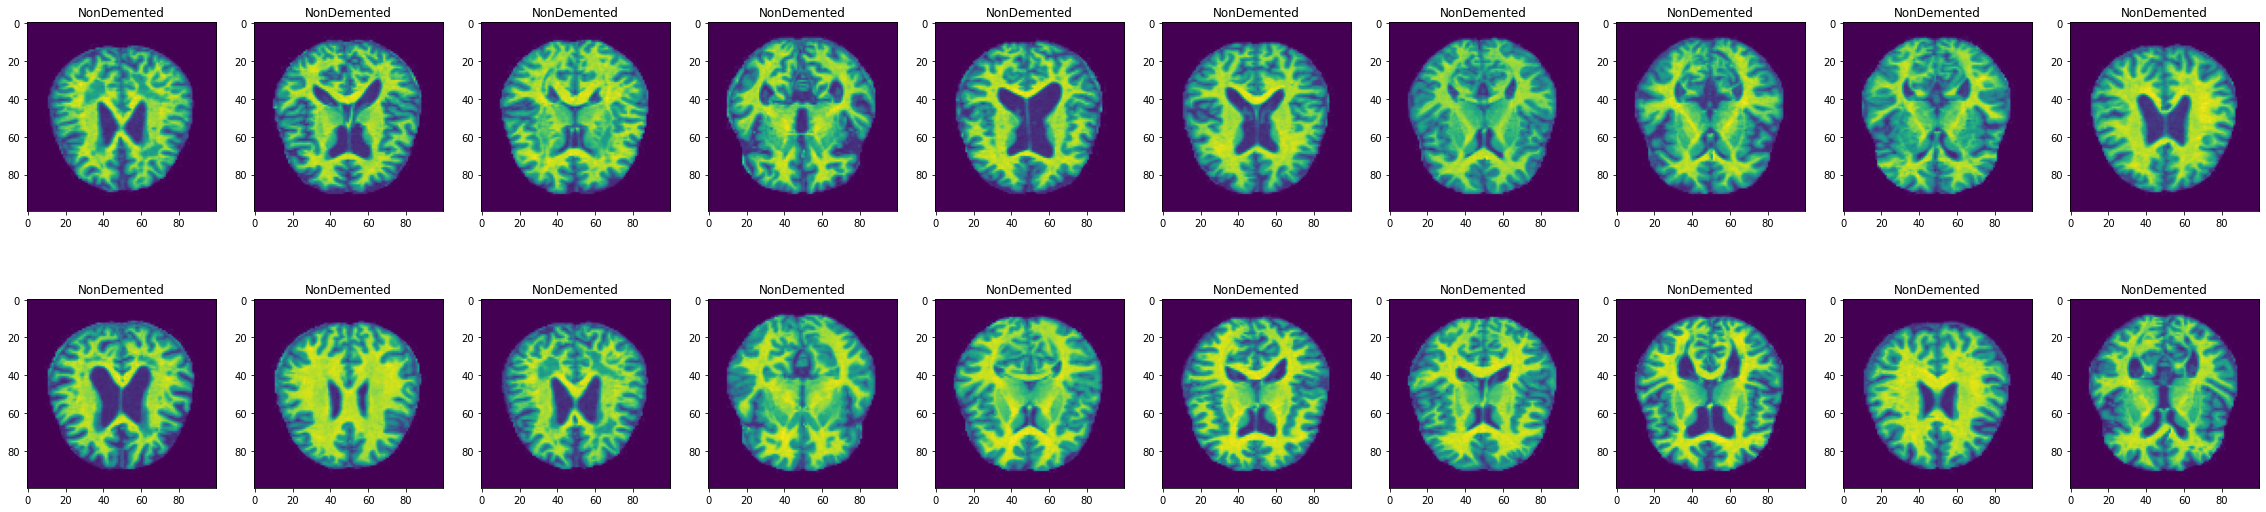

In [ ]:
'''Plot parsed image tensors with size at 100 * 100 and 1 channel'''
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(dt['image_tensor']):
    ax = plt.subplot(10, 10, img_index + 1)
    img_tensor = tf.reshape(img_tensor, shape=(100,100))
    plt.imshow(img_tensor)
    plt.title(label_list[dt['label'].numpy()[img_index]])

# 3.Generate Image Representation

In [ ]:
from VAE_model import VAE

In [ ]:
'''Generate vae represents'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
latent_dim= 128
channels=3
batch=1
size=(100,100)
epoch= 500
path = '/content/drive/My Drive/Projects/codes/vae_checkpoints'
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=batch, 
                                                           size=size,
                                                           channels=channels,
                                                           shuffle=True)
vae = VAE(latent_dim=latent_dim,
          channels=channels,
          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True))
vae.load_weights(path)
vae.fit(image_dataset=image_dataset,
        checkpoints_path=path,
        epochs=epoch)

epoch:  1, epoch_time: 33.33580, total_loss: 0.29880, kl_loss: 0.00068, reconstruction_loss: 0.29813
epoch:  2, epoch_time: 32.39642, total_loss: 0.29865, kl_loss: 0.00068, reconstruction_loss: 0.29798
epoch:  3, epoch_time: 32.99387, total_loss: 0.29866, kl_loss: 0.00068, reconstruction_loss: 0.29798
epoch:  4, epoch_time: 31.10755, total_loss: 0.29856, kl_loss: 0.00068, reconstruction_loss: 0.29789
epoch:  5, epoch_time: 32.25022, total_loss: 0.29850, kl_loss: 0.00068, reconstruction_loss: 0.29782
epoch:  6, epoch_time: 31.12655, total_loss: 0.29848, kl_loss: 0.00068, reconstruction_loss: 0.29780
epoch:  7, epoch_time: 31.34578, total_loss: 0.29850, kl_loss: 0.00068, reconstruction_loss: 0.29782
epoch:  8, epoch_time: 31.74974, total_loss: 0.29844, kl_loss: 0.00068, reconstruction_loss: 0.29776
epoch:  9, epoch_time: 31.59046, total_loss: 0.29841, kl_loss: 0.00068, reconstruction_loss: 0.29773
epoch: 10, epoch_time: 31.40048, total_loss: 0.29845, kl_loss: 0.00068, reconstruction_loss

In [ ]:
'''Plot real images vs reconstructed images'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
image_dataset = GraphDataProcess.parse_tfr_to_image_tensor(path_list=tfr_list, 
                                                           batch_size=10, 
                                                           size=(100,100),
                                                           channels=3,
                                                           shuffle=True)
data = iter(image_dataset).get_next()
data

{'id': <tf.Tensor: shape=(10,), dtype=string, numpy=
 array([b'0_3017.jpg', b'0_1059.jpg', b'0_1843.jpg', b'0_381.jpg',
        b'0_1401.jpg', b'0_1082.jpg', b'0_291.jpg', b'0_1144.jpg',
        b'0_2099.jpg', b'0_515.jpg'], dtype=object)>,
 'image_tensor': <tf.Tensor: shape=(10, 100, 100, 3), dtype=float32, numpy=
 array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 

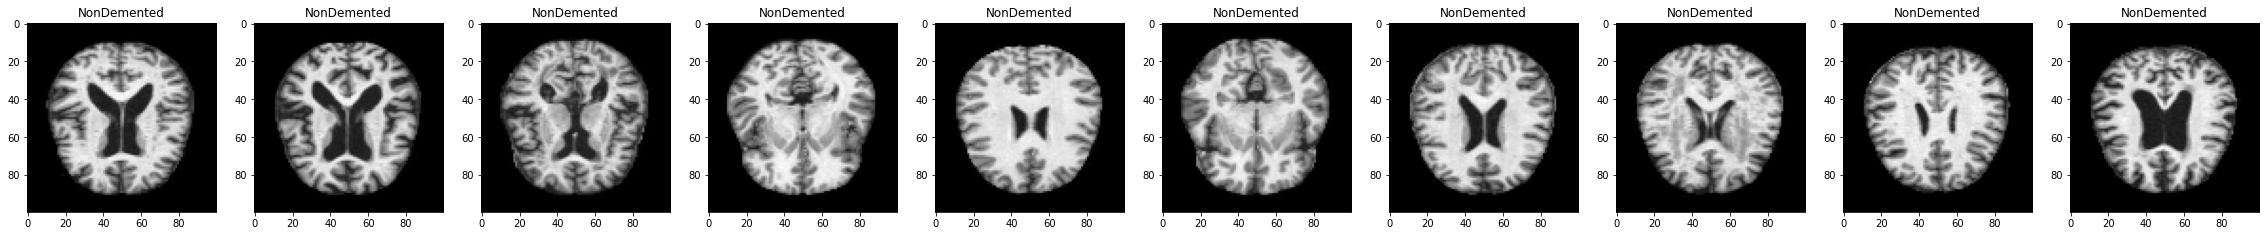

In [ ]:
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(data['image_tensor']):
    plt.subplot(1, 10, img_index + 1)
    plt.imshow(img_tensor)
    plt.title(label_list[data['label'].numpy()[img_index]])

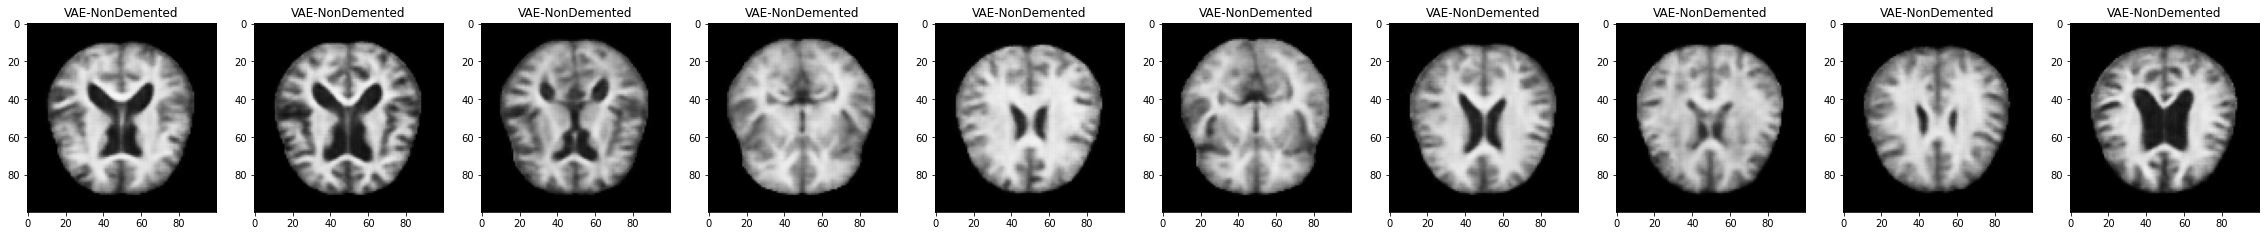

In [ ]:
plt.figure(figsize=(40,50))
for img_index, img_tensor in enumerate(data['image_tensor']):
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    _m, _l, rep = vae.encoder(img_tensor)
    img_new = vae.decoder(rep)
    img_new = tf.squeeze(img_new, axis=0)
    plt.subplot(1, 10, img_index + 1)
    plt.imshow(tf.abs(img_new))
    plt.title('VAE-'+label_list[data['label'].numpy()[img_index]])

In [ ]:
'''generate image represents tfr files'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
img_data_list = [ GraphDataProcess.parse_tfr_to_image_tensor(path_list=[tfr_path], batch_size=1, size=(100,100), channels=3, shuffle=False) for tfr_path in tfr_list]
print(*img_data_list,sep='\n')
# GraphDataProcess.generate_tfr_vae_represent(image_dataset_list=img_data_list, vae_model=vae, tfr_rep_list=tfr_rep_list)

<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>
<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>
<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>
<BatchDataset shapes: {id: (None,), label: (None,), image_tensor: (None, 100, 100, 3)}, types: {id: tf.string, label: tf.int64, image_tensor: tf.float32}>


In [ ]:
'''parse image represents tfr files'''
img_rep_dataset = GraphDataProcess.parse_tfr_to_image_rep(path_list=tfr_rep_list, rep_dim= 128, batch_size=1, shuffle=False)
iter(img_rep_dataset).get_next()

{'id': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'0_414'], dtype=object)>,
 'label': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>,
 'representation': <tf.Tensor: shape=(1, 128), dtype=float32, numpy=
 array([[-2.03878736e+00, -2.09298581e-01, -1.72096774e-01,
         -8.94609153e-01,  7.73171961e-01,  7.89946437e-01,
          2.01113760e-01,  6.25356376e-01, -2.50524908e-01,
         -1.30396569e+00, -5.40424347e-01,  1.77865434e+00,
          1.21036857e-01, -5.68654776e-01, -4.98007417e-01,
         -3.79402071e-01,  8.25518787e-01, -6.02368414e-01,
          2.54196262e+00, -4.19529587e-01, -3.19267809e-01,
         -9.16819870e-01,  2.42420197e+00,  1.03085101e+00,
         -8.28796029e-01,  1.10987377e+00,  5.97813427e-01,
         -2.11311042e-01, -1.20946038e+00, -1.27377141e+00,
          8.19241345e-01, -1.51441598e+00, -3.01745851e-02,
          3.08537245e-01,  5.11180699e-01, -1.47172511e+00,
          9.94251132e-01, -8.62695158e-01, -3.76009196e-02,


# 4.Generate Image Graphs

In [ ]:
'''generate graphs without clustering'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
tsv_graph_list = [f'{root_path}{label}_graph_no_cluster.tsv' for label in label_list]

cosine_similarity_threshold=0.60
# generate graph without cluster
for path_index, path in enumerate(tfr_rep_list):
    nsl.tools.build_graph(embedding_files = [path], 
                          output_graph_path = tsv_graph_list[path_index], 
                          similarity_threshold= cosine_similarity_threshold,
                          id_feature_name='id', 
                          embedding_feature_name='representation')

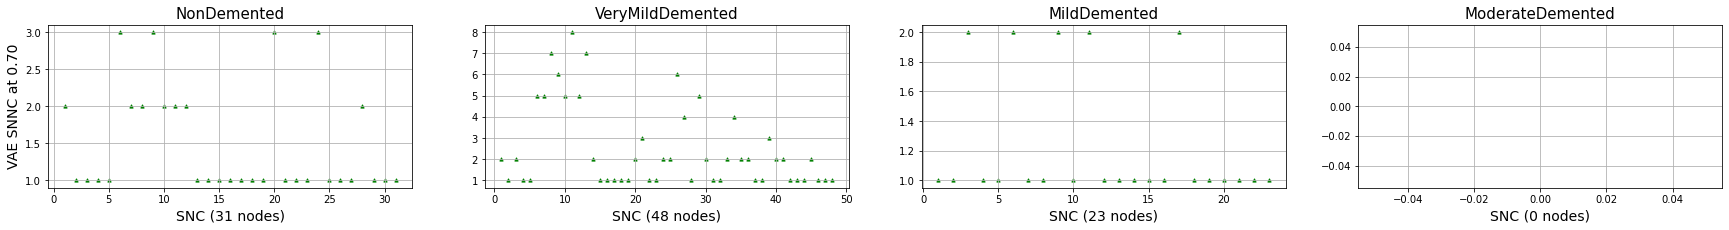

In [ ]:
"""plot the count of neighbour nodes of each seed node"""
plt.figure(figsize=(30,3))
for index, path in enumerate(tsv_graph_list):
    graph = nsl.tools.read_tsv_graph(path)
    nbr_count=[]
    for key in graph.keys():
        nbr_count.append(len(graph[f'{key}'].keys()))

    plt.subplot(1, 4, index + 1)
    plt.scatter(np.linspace(1,len(nbr_count), len(nbr_count)),nbr_count, s=10, c='g', marker='^')
    plt.xlabel(f'SNC ({len(graph.keys())} nodes)', fontsize=14)
    if index ==0: 
      plt.ylabel(f'VAE SNNC at 0.70', fontsize=14)
    title = f'{label_list[index]}'
    plt.title(title, fontsize=15)
    plt.grid()

## Generate Image Graphs with Kmeans clustering

In [ ]:
from Kmeans import KMeans, KMeansModels

In [ ]:
'''load image represents data for K value searching for each label images'''
tfr_list = [f'{root_path}{label}.tfr' for label in label_list]
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
img_rep_data_list = [GraphDataProcess.parse_tfr_to_image_rep(path_list=[path], rep_dim= 128, batch_size=3500, shuffle=False) for path in tfr_rep_list]

In [ ]:
iter(img_rep_data_list[3]).get_next()

{'id': <tf.Tensor: shape=(64,), dtype=string, numpy=
 array([b'3_3', b'3_38', b'3_59', b'3_8', b'3_33', b'3_9', b'3_62',
        b'3_16', b'3_48', b'3_20', b'3_2', b'3_60', b'3_43', b'3_53',
        b'3_57', b'3_42', b'3_44', b'3_50', b'3_49', b'3_0', b'3_14',
        b'3_47', b'3_12', b'3_61', b'3_58', b'3_51', b'3_11', b'3_1',
        b'3_39', b'3_22', b'3_4', b'3_46', b'3_27', b'3_45', b'3_21',
        b'3_17', b'3_41', b'3_25', b'3_24', b'3_13', b'3_36', b'3_35',
        b'3_32', b'3_55', b'3_19', b'3_37', b'3_28', b'3_15', b'3_18',
        b'3_31', b'3_29', b'3_5', b'3_6', b'3_52', b'3_63', b'3_30',
        b'3_56', b'3_54', b'3_26', b'3_23', b'3_40', b'3_10', b'3_34',
        b'3_7'], dtype=object)>,
 'label': <tf.Tensor: shape=(64,), dtype=int64, numpy=
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])>,
 'represen

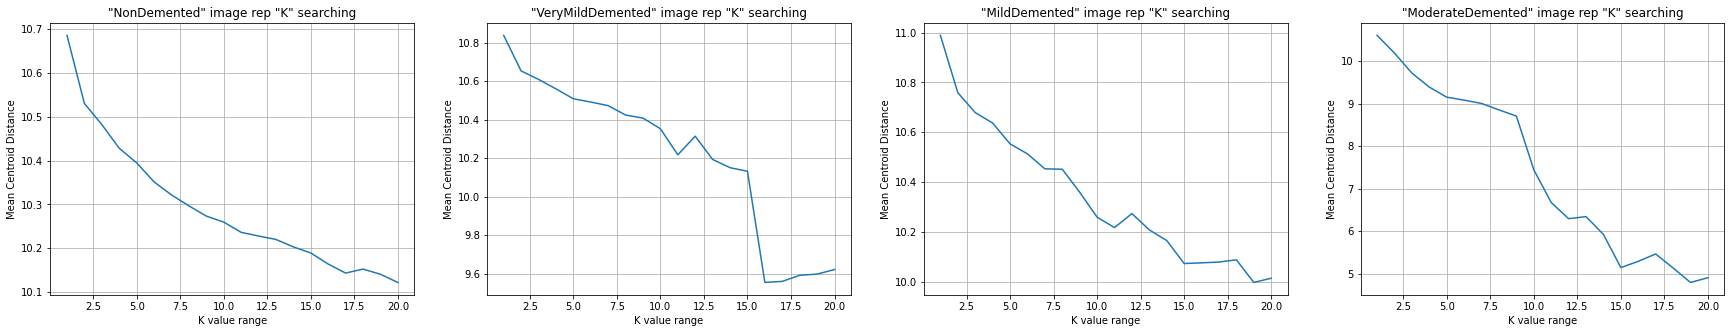

In [ ]:
'''searching K value for each label data'''
K_limit=20
epoch_per_K=30
plt.figure(figsize=(30,5))
for data_index, data in enumerate(img_rep_data_list):
    data_rep = iter(data).get_next()['representation']
    kmeans = KMeans(data=data_rep, K=1)
    kmeans.set_centroids(optimize=True)
    
    c_means_clc, K_limit = kmeans.searching_K(K_limit=K_limit, epoch_per_K=epoch_per_K, verbose=0)
    
    plt.subplot(1, 4, data_index + 1)
    plt.plot(np.linspace(1, K_limit, K_limit), c_means_clc)
    title = f'"{label_list[data_index]}" image rep "K" searching'
    plt.title(title)
    plt.xlabel('K value range')
    plt.ylabel('Mean Centroid Distance')
    plt.grid()

In [ ]:
"""generate K_means models for each label data"""
batch= 1000
rep_dim= 128
K_value_list = [12,11,11,5] # for both train and test data
epoch= 30
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
Kmeans_model_list = KMeansModels.generate_model_list(path_list = tfr_rep_list, rep_dim=rep_dim, K_list=K_value_list, epoch=epoch, batch=batch)


====================== Model 0 training ======================

epoch:  1 ,centroid mean:  0.017689567
epoch:  2 ,centroid mean:  0.016770074
epoch:  3 ,centroid mean:  0.017877618
epoch:  4 ,centroid mean:  0.018585132
epoch:  5 ,centroid mean:  0.019253077
epoch:  6 ,centroid mean:  0.019440623
epoch:  7 ,centroid mean:  0.019217527
epoch:  8 ,centroid mean:  0.019481564
epoch:  9 ,centroid mean:  0.019667357
epoch:  10 ,centroid mean:  0.01973908
epoch:  11 ,centroid mean:  0.019768039
epoch:  12 ,centroid mean:  0.019768039
epoch:  13 ,centroid mean:  0.019768039
epoch:  14 ,centroid mean:  0.019768039
epoch:  15 ,centroid mean:  0.019768039
epoch:  16 ,centroid mean:  0.019768039
epoch:  17 ,centroid mean:  0.019768039
epoch:  18 ,centroid mean:  0.019768039
epoch:  19 ,centroid mean:  0.019768039
epoch:  20 ,centroid mean:  0.019768039
epoch:  21 ,centroid mean:  0.019768039
epoch:  22 ,centroid mean:  0.019768039
epoch:  23 ,centroid mean:  0.019768039
epoch:  24 ,centroid mean

In [ ]:
Kmeans_model_list

In [ ]:
'''generate all AD image into one graph with clustering'''
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
complete_graph = GraphDataProcess.generate_complete_graph_with_cluster_kmeans(tfr_rep_path_list= tfr_rep_list,
                                                                      prefix_list= [0,1,2,3], 
                                                                      model_list= Kmeans_model_list, 
                                                                      represent_dim= 128, 
                                                                      file_output_path= f'{root_path}AD_graph_VAE_KMeans.tsv',
                                                                      similarity_threshold=0.33)

In [ ]:
complete_graph

{'0c4': {'0c0': 0.56552,
  '0c11': 0.621909,
  '0c12': 0.347627,
  '0c6': 0.54556,
  '0c9': 0.522761},
 '0c11': {'0c0': 0.62537,
  '0c2': 0.44592,
  '0c3': 0.366453,
  '0c4': 0.621909,
  '0c6': 0.621376,
  '0c9': 0.53637},
 '0c12': {'0c0': 0.717352,
  '0c1': 0.409357,
  '0c10': 0.359069,
  '0c2': 0.443983,
  '0c4': 0.347627,
  '0c5': 0.393363,
  '0c6': 0.406866,
  '0c7': 0.510126,
  '0c9': 0.438934},
 '0c9': {'0c0': 0.589967,
  '0c11': 0.53637,
  '0c12': 0.438934,
  '0c2': 0.46484,
  '0c4': 0.522761,
  '0c6': 0.440378},
 '0c0': {'0c1': 0.465141,
  '0c10': 0.488674,
  '0c11': 0.62537,
  '0c12': 0.717352,
  '0c2': 0.581465,
  '0c3': 0.573354,
  '0c4': 0.56552,
  '0c5': 0.60319,
  '0c6': 0.695933,
  '0c7': 0.677884,
  '0c8': 0.480449,
  '0c9': 0.589967},
 '0c6': {'0c0': 0.695933,
  '0c11': 0.621376,
  '0c12': 0.406866,
  '0c2': 0.499804,
  '0c3': 0.345139,
  '0c4': 0.54556,
  '0c7': 0.330588,
  '0c9': 0.440378},
 '0c10': {'0c0': 0.488674,
  '0c1': 0.508621,
  '0c12': 0.359069,
  '0c5': 0.

## Generate Image Graphs with Hierarcichal clustering


In [ ]:
from Hierarchical import Hierchaical, HierchaicalModels

In [ ]:
'''load the VAErep path list'''
K_value_list = [12,11,11,5]
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]

In [ ]:
'''train hierarchical models in a list'''
model_list = HierchaicalModels.generate_model_list(path_list=tfr_rep_list, rep_dim=128, cluster_num_list= K_value_list, batch=5000)
model_list


====================== Model 0 training ======================

Done...

====================== Model 1 training ======================

Done...

====================== Model 2 training ======================

Done...

====================== Model 3 training ======================

Done...


In [ ]:
'''print the cluster length of each label'''
for model_index, model in enumerate(model_list):
    clusters, cluster_length = model.get_clusters()
    print(f'{label_list[model_index]} model clusters length:\n{cluster_length}')

NonDemented model clusters length:
[480, 305, 513, 209, 228, 524, 216, 127, 327, 127, 28, 116]
VeryMildDemented model clusters length:
[77, 164, 347, 379, 151, 182, 162, 469, 154, 78, 77]
MildDemented model clusters length:
[97, 155, 141, 36, 69, 60, 32, 66, 37, 91, 112]
ModerateDemented model clusters length:
[14, 18, 17, 8, 7]


In [ ]:
'''generate complete graph with hierachical clusters'''
tfr_rep_list = [f'{root_path}{label}_VAErep.tfr' for label in label_list]
final_graph = GraphDataProcess.generate_complete_graph_with_cluster_hierarch(tfr_path_list=tfr_rep_list, 
                                                                             prefix_list=[0,1,2,3], 
                                                                             model_list=model_list, 
                                                                             represent_dim=128,
                                                                             file_output_path=f'{root_path}AD_graph_VAE_Hierarchy.tsv',
                                                                             similarity_threshold = 0.33)

In [ ]:
final_graph

## Generate compelete graph without any cluster algorithms

In [ ]:
'''generate complete graph without clusters'''
tsv_graph_list = [f'{root_path}{label}_graph_no_cluster.tsv' for label in label_list]
file_output_path = f'{root_path}AD_graph_VAE_no_cluster.tsv'
all_cluster_edges_list=[]
for path_index, path in enumerate(tsv_graph_list[1:]):
  cluster_graph = nsl.tools.read_tsv_graph(path)
  for item in cluster_graph.items():
      for item_II in item[1].items():
          edge_item = [item[0], item_II[0], item_II[1]]
          all_cluster_edges_list.append(edge_item)
# merge all cluster graphs into base centroid graph
complete_graph = nsl.tools.read_tsv_graph(tsv_graph_list[0])
for edge in all_cluster_edges_list:
    nsl.tools.add_edge(complete_graph, edge)
# save graph data into .tsv file
if file_output_path:
    nsl.tools.write_tsv_graph(filename=file_output_path, graph=complete_graph)

# 5.Generate Train & Test Graph Data

In [ ]:
NBR_FEATURE_PREFIX = 'NL_nbr_'
NBR_WEIGHT_SUFFIX = '_weight'

In [ ]:
'''import python file for NSL data format processing'''
from nsl_data_processing import GenerateTrainTestDict, NSLDataFormat

In [ ]:
'''generate train and test examples from AD images'''
path_list = [f'{root_path}{label}/' for label in label_list]
train_examples, test_examples = GenerateTrainTestDict.get_train_test_dict(path_list=path_list, train_percentage=0.7)
print('train examples: ', len(train_examples.keys()))
print('test examples', len(test_examples.keys()))

train examples:  4489
test examples 1921


In [ ]:
train_examples

Output hidden; open in https://colab.research.google.com to view.

## Generate train graph data without any cluster algorithms

In [ ]:
'''merge train examples with the graph_without_clusters'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_VAE_no_cluster.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

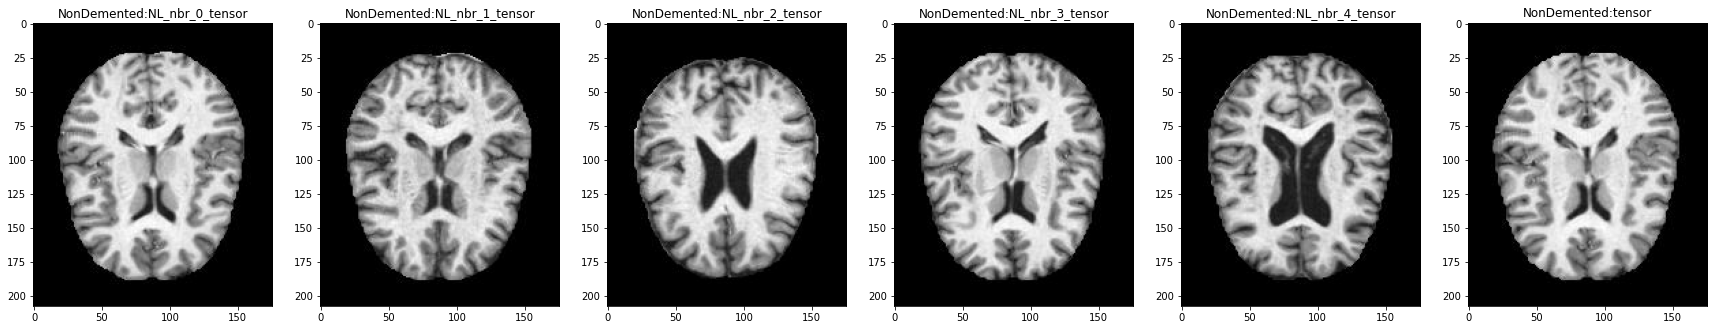

In [ ]:
'''parse train_graph_examples without clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed train_graph examples without clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data without any cluster algorithms

In [ ]:
'''merge test examples without clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_VAE_no_cluster.tsv')
max_seed_node_neighbours = 5

nsl_test= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_test.generate_node_nbrs_tfr(output_file_path=test_tfr_path)

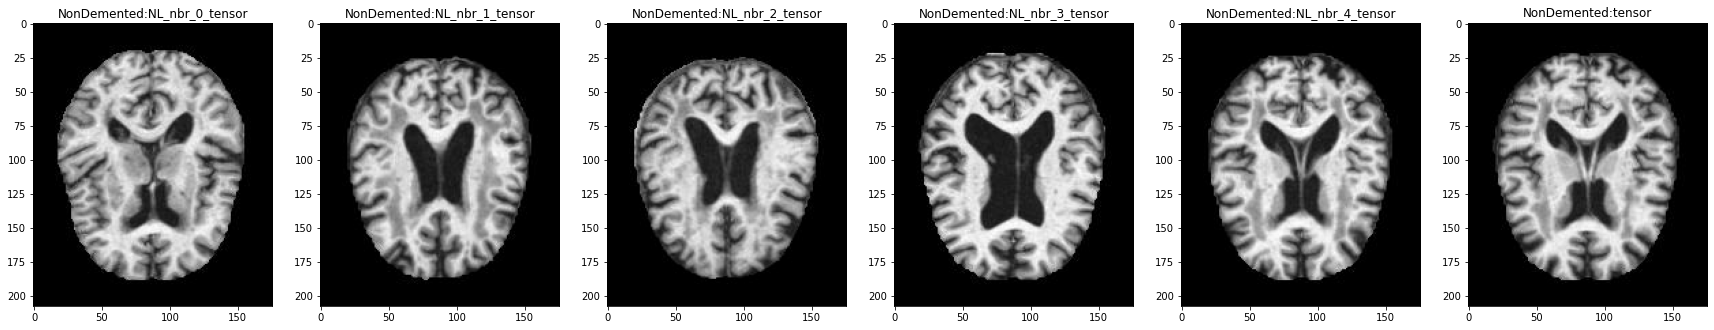

In [ ]:
'''parse test_graph_examples'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed test_graph examples with examples'''
label = tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate train graph data with Hierarchical clusters

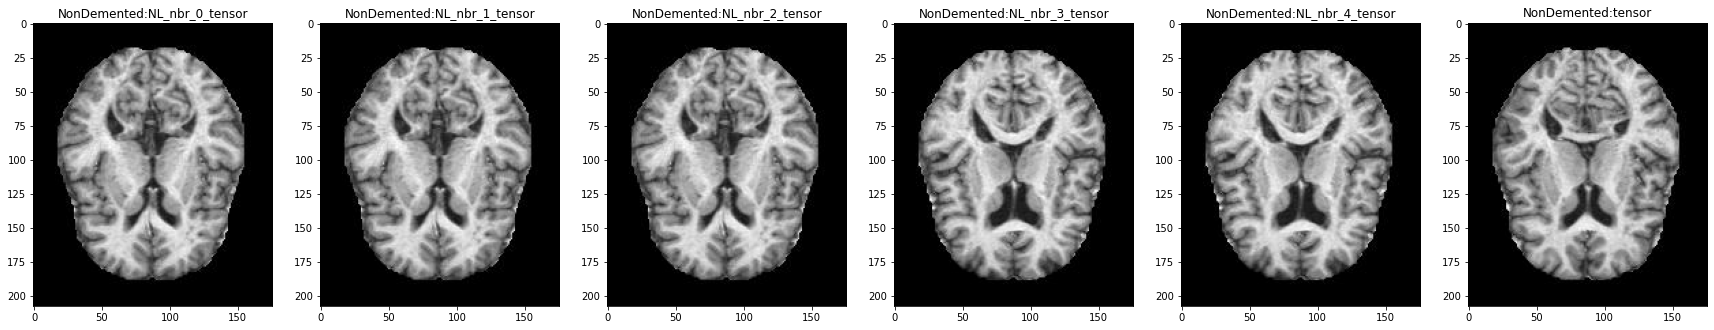

In [ ]:
'''merge train examples with the graph ( hierarchical clusters)'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_VAE_Hierarchy.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

'''parse train_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()

'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data with Hierarchical clusters

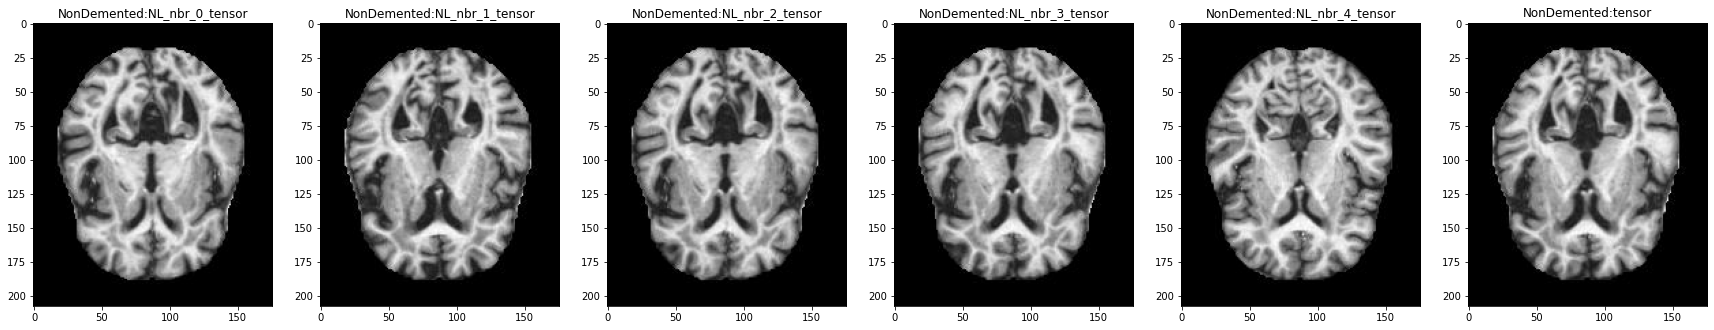

In [ ]:
'''merge test examples with the graph clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_VAE_Hierarchy.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=test_tfr_path)
'''parse test_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                         batch_size=batch,
                                                         max_neighbor_number=max_seed_node_neighbours,
                                                         image_size=parsed_image_size,
                                                         image_channels=parsed_image_channel,
                                                         shuffle=True)
data_sample = iter(test_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate train graph data with Kmeans clusters

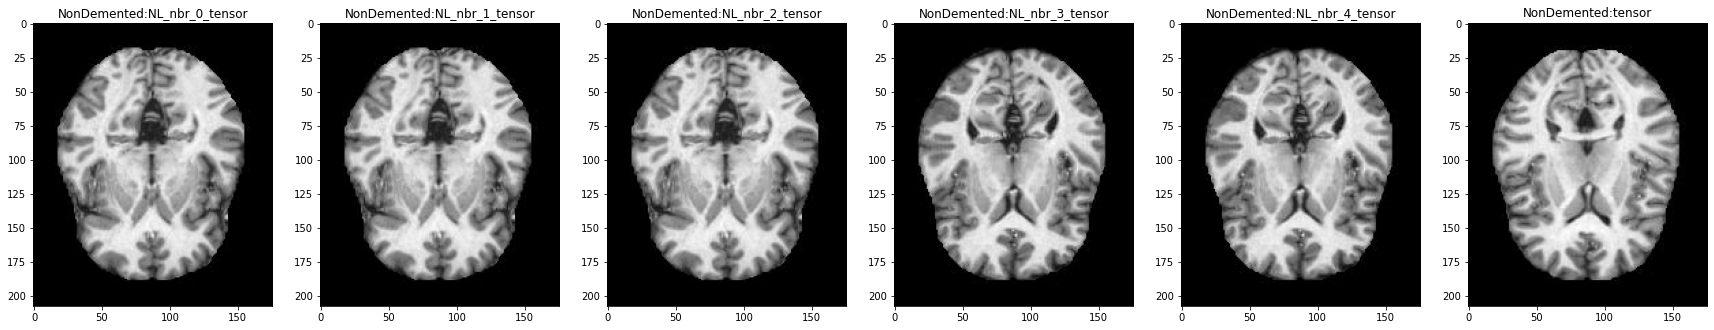

In [ ]:
'''merge train examples with the graph (with clusters)'''
train_tfr_path = f'{root_path}train_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_VAE_KMeans.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=train_examples, 
                         rem_dict_examples=test_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=train_tfr_path)

'''parse train_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                   batch_size=batch,
                                                   max_neighbor_number=max_seed_node_neighbours,
                                                   image_size=parsed_image_size,
                                                   image_channels=parsed_image_channel,
                                                   shuffle=True)
data_sample = iter(train_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

## Generate test graph data with Kmeans clusters

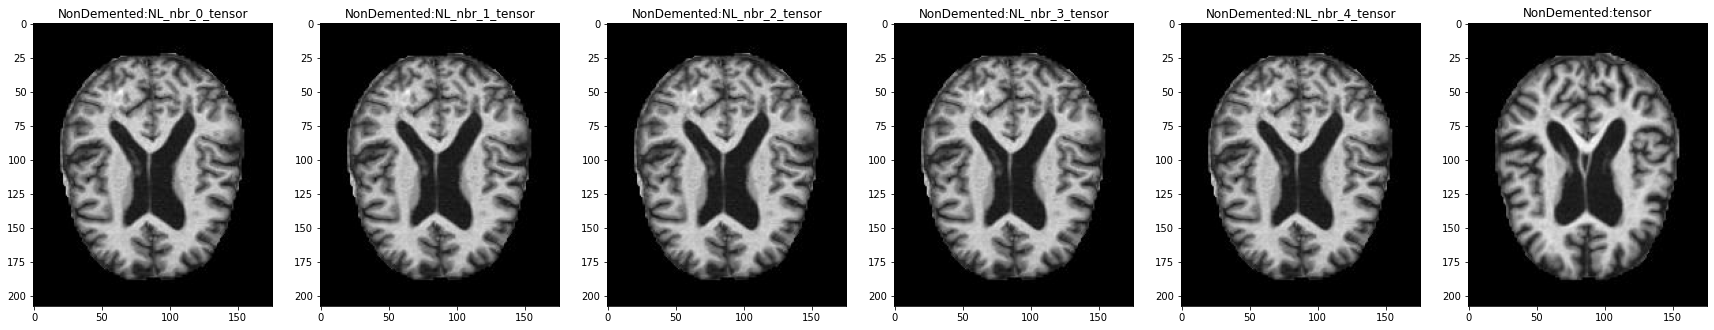

In [ ]:
'''merge test examples with the graph clusters'''
test_tfr_path = f'{root_path}test_data.tfr'
graph = nsl.tools.read_tsv_graph(f'{root_path}AD_graph_VAE_KMeans.tsv')
max_seed_node_neighbours = 5

nsl_train= NSLDataFormat(seed_dict_examples=test_examples, 
                         rem_dict_examples=train_examples, 
                         graph=graph, 
                         max_nbrs=max_seed_node_neighbours)
nsl_train.generate_node_nbrs_tfr(output_file_path=test_tfr_path)
'''parse test_graph_examples with clusters'''
parsed_image_size=(208,176)
parsed_image_channel=3
batch=1
test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                         batch_size=batch,
                                                         max_neighbor_number=max_seed_node_neighbours,
                                                         image_size=parsed_image_size,
                                                         image_channels=parsed_image_channel,
                                                         shuffle=True)
data_sample = iter(test_image_dataset).get_next()
'''plot parsed train_graph examples with clusters'''
label =  tf.argmax(data_sample[1], axis=0)
sample = data_sample[0]
img_index=0
plt.figure(figsize=(30,10))
for key, value in sample.items():
    if key.split('_')[-1]=='tensor':
        plt.subplot(1,max_seed_node_neighbours+1,img_index + 1)
        img_tensor = tf.reshape(value, shape=value.shape[1:])
        plt.imshow(img_tensor)
        plt.title(f'{label_list[label.numpy()[0]]}:{key}')
        img_index +=1

# 6.Train Models

In [ ]:
from AD_model_builder import AD_params, ADModelBuilder, AccEarlyStop

In [ ]:
'''define CNN base model'''

def build_base_model(): 
    ipt= tf.keras.Input(shape=(100,100,3), name='tensor')
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block1_conv1')(ipt)
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block1_conv2')(ipt)
    opt= tf.keras.layers.BatchNormalization(name='block1_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block1_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block1_pool')(opt)

    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block2_conv1')(opt)
    opt= tf.keras.layers.Conv2D(64, (3,3), padding='same', name='block2_conv2')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block2_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block2_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block2_pool')(opt)

    opt= tf.keras.layers.Conv2D(128, (3,3), padding='same', name='block3_conv1')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block3_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block3_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block3_pool')(opt)
    
    opt= tf.keras.layers.Conv2D(128, (3,3), padding='same', name='block4_conv1')(opt)
    opt= tf.keras.layers.BatchNormalization(name='block4_BN')(opt)
    opt= tf.keras.layers.LeakyReLU(name='block4_lky_relu')(opt)
    opt= tf.keras.layers.Dropout(0.4)(opt)
    opt= tf.keras.layers.MaxPool2D((2,2), name='block4_pool')(opt)

    opt= tf.keras.layers.Flatten()(opt)
    opt= tf.keras.layers.Dense(128)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(128)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(64)(opt)
    opt= tf.keras.layers.BatchNormalization()(opt)
    opt= tf.keras.layers.LeakyReLU()(opt)
    opt= tf.keras.layers.Dropout(0.3)(opt)
    opt= tf.keras.layers.Dense(4, activation='softmax')(opt)
    
    base_model = tf.keras.Model(ipt,opt)
    return base_model

## Train base model with images

In [ ]:
'''load data for base model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
'''train base model'''
base_model = build_base_model()
base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                   loss=tf.losses.CategoricalCrossentropy(), 
                   metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
history = base_model.fit(train_image_dataset,
                         validation_data=test_image_dataset,
                         callbacks = [AccEarlyStop(val_acc_base=0.9)],
                         epochs=100,
                         verbose=1)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


31/31 [==============================] - 9s 279ms/step - loss: 1.6485 - accuracy: 0.3108 - auc: 0.5611 - f1_score: 0.2282 - val_loss: 1.4478 - val_accuracy: 0.3581 - val_auc: 0.4824 - val_f1_score: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 8s 259ms/step - loss: 1.4770 - accuracy: 0.3818 - auc: 0.6381 - f1_score: 0.3052 - val_loss: 1.6288 - val_accuracy: 0.3581 - val_auc: 0.4819 - val_f1_score: 0.3582
Epoch 3/100
31/31 [==============================] - 8s 259ms/step - loss: 1.4351 - accuracy: 0.4154 - auc: 0.6626 - f1_score: 0.3349 - val_loss: 1.6737 - val_accuracy: 0.3581 - val_auc: 0.4414 - val_f1_score: 0.3581
Epoch 4/100
31/31 [==============================] - 8s 258ms/step - loss: 1.3440 - accuracy: 0.4429 - auc: 0.6972 - f1_score: 0.3732 - val_loss: 1.6232 - val_accuracy: 0.3581 - val_auc: 0.4440 - val_f1_score: 0.3581
Epoch 5/100
31/31 [==============================] - 8s 258ms/step - loss: 1.3226 - accuracy: 0.4457 - auc: 0.7033 - f1_score: 0.3754 - val_

In [ ]:
base_model.save('/content/drive/My Drive/Projects/codes/base_model_1012.h5')

In [ ]:
base_model = tf.keras.models.load_model('/content/drive/My Drive/Projects/codes/base_model_1012.h5')

In [ ]:
results = base_model.evaluate(test_image_dataset)
print(results)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


14/14 [==============================] - 2s 155ms/step - loss: 1.1413 - accuracy: 0.5682 - auc: 0.7859 - f1_score: 0.5357
[1.1413487195968628, 0.5681685209274292, 0.7858923077583313, 0.5357368588447571]


## Train NSL model with image graphs without clusters

In [ ]:
'''load data wihtout clusters in the graph for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training wihtout clusters '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     35/Unknown - 17s 498ms/step - loss: 1.8591 - accuracy: 0.2656 - auc: 0.5149 - f1_score: 0.1962 - scaled_graph_loss: 0.0136

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


35/35 [==============================] - 21s 601ms/step - loss: 1.8591 - accuracy: 0.2656 - auc: 0.5149 - f1_score: 0.1962 - scaled_graph_loss: 0.0136 - val_loss: 1.5553 - val_accuracy: 0.3534 - val_auc: 0.5525 - val_f1_score: 0.1545
Epoch 2/50
35/35 [==============================] - 18s 527ms/step - loss: 1.6494 - accuracy: 0.3530 - auc: 0.6042 - f1_score: 0.2994 - scaled_graph_loss: 0.0126 - val_loss: 1.6687 - val_accuracy: 0.3073 - val_auc: 0.4940 - val_f1_score: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 18s 527ms/step - loss: 1.5679 - accuracy: 0.3866 - auc: 0.6397 - f1_score: 0.3340 - scaled_graph_loss: 0.0116 - val_loss: 1.5400 - val_accuracy: 0.3524 - val_auc: 0.5614 - val_f1_score: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 18s 525ms/step - loss: 1.5111 - accuracy: 0.4054 - auc: 0.6604 - f1_score: 0.3545 - scaled_graph_loss: 0.0112 - val_loss: 1.5531 - val_accuracy: 0.3513 - val_auc: 0.5632 - val_f1_score: 0.0000e+00
Epoch 5/50
35/35 [=

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_noClusters_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

15/15 [==============================] - 2s 165ms/step - loss: 1.1361 - accuracy: 0.5723 - auc: 0.7880 - f1_score: 0.4869
[1.136080026626587, 0.5722513198852539, 0.7880182862281799, 0.4869351387023926]


## Train NSL model with image graphs with Kmeans clusters

In [ ]:
'''load data for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     31/Unknown - 14s 444ms/step - loss: 1.6375 - accuracy: 0.3456 - auc: 0.6121 - f1_score: 0.2860 - scaled_graph_loss: 0.0124

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


31/31 [==============================] - 17s 543ms/step - loss: 1.6375 - accuracy: 0.3456 - auc: 0.6121 - f1_score: 0.2860 - scaled_graph_loss: 0.0124 - val_loss: 1.2679 - val_accuracy: 0.3581 - val_auc: 0.6435 - val_f1_score: 0.2265
Epoch 2/50
31/31 [==============================] - 17s 540ms/step - loss: 1.4750 - accuracy: 0.4111 - auc: 0.6704 - f1_score: 0.3553 - scaled_graph_loss: 0.0115 - val_loss: 1.4201 - val_accuracy: 0.3581 - val_auc: 0.6462 - val_f1_score: 0.3581
Epoch 3/50
31/31 [==============================] - 17s 545ms/step - loss: 1.3856 - accuracy: 0.4502 - auc: 0.7042 - f1_score: 0.3996 - scaled_graph_loss: 0.0108 - val_loss: 1.4573 - val_accuracy: 0.3581 - val_auc: 0.7302 - val_f1_score: 0.3581
Epoch 4/50
31/31 [==============================] - 17s 545ms/step - loss: 1.3488 - accuracy: 0.4687 - auc: 0.7164 - f1_score: 0.4244 - scaled_graph_loss: 0.0103 - val_loss: 1.2536 - val_accuracy: 0.3581 - val_auc: 0.7719 - val_f1_score: 0.3581
Epoch 5/50
31/31 [=============

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

14/14 [==============================] - 2s 157ms/step - loss: 1.0533 - accuracy: 0.5711 - auc: 0.8282 - f1_score: 0.5434
[1.0532935857772827, 0.5710942149162292, 0.8281930685043335, 0.5434227585792542]


## Train NSL model with image graphs with Hierarchical clusters

In [ ]:
'''load data for NSL model'''
parsed_image_size=(100,100)
parsed_image_channel=3
max_seed_node_neighbours = 5
batch= 128
train_tfr_path = f'{root_path}train_data.tfr'
test_tfr_path = f'{root_path}test_data.tfr'

train_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[train_tfr_path],
                                                                         batch_size=batch,
                                                                         max_neighbor_number=max_seed_node_neighbours,
                                                                         image_size=parsed_image_size,
                                                                         image_channels=parsed_image_channel,
                                                                         shuffle=True)

test_image_dataset = NSLDataFormat.parse_tfr_to_dataset(file_path_list=[test_tfr_path],
                                                                        batch_size=batch,
                                                                        max_neighbor_number=max_seed_node_neighbours,
                                                                        image_size=parsed_image_size,
                                                                        image_channels=parsed_image_channel,
                                                                        shuffle=True)

In [ ]:
''' NSL model training '''
base_model = build_base_model()
graph_reg_config = nsl.configs.make_graph_reg_config(neighbor_prefix="NL_nbr_",
                                                     neighbor_weight_suffix='_weight',
                                                     max_neighbors= 5,
                                                     multiplier= 0.1,
                                                     distance_type= nsl.configs.DistanceType.COSINE,
                                                     sum_over_axis=-1)
graph_reg_model = nsl.keras.GraphRegularization(base_model,graph_reg_config)

METRICS = [tf.keras.metrics.AUC(name='auc')]
graph_reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True), 
                        loss=tf.losses.CategoricalCrossentropy(), 
                        metrics=['accuracy', 'AUC',  tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.5)])
                        
graph_reg_history = graph_reg_model.fit(train_image_dataset, 
                                        validation_data=test_image_dataset,
                                        callbacks = [AccEarlyStop(val_acc_base=0.9)],
                                        epochs=50,
                                        verbose=1)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


     33/Unknown - 19s 566ms/step - loss: 1.6279 - accuracy: 0.3364 - auc: 0.5902 - f1_score: 0.2685 - scaled_graph_loss: 0.0137

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['NL_nbr_0_id', 'NL_nbr_0_tensor', 'NL_nbr_0_weight', 'NL_nbr_1_id', 'NL_nbr_1_tensor', 'NL_nbr_1_weight', 'NL_nbr_2_id', 'NL_nbr_2_tensor', 'NL_nbr_2_weight', 'NL_nbr_3_id', 'NL_nbr_3_tensor', 'NL_nbr_3_weight', 'NL_nbr_4_id', 'NL_nbr_4_tensor', 'NL_nbr_4_weight', 'id'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


33/33 [==============================] - 22s 663ms/step - loss: 1.6279 - accuracy: 0.3364 - auc: 0.5902 - f1_score: 0.2685 - scaled_graph_loss: 0.0137 - val_loss: 1.3885 - val_accuracy: 0.3546 - val_auc: 0.4684 - val_f1_score: 0.2114
Epoch 2/50
33/33 [==============================] - 20s 619ms/step - loss: 1.4778 - accuracy: 0.3964 - auc: 0.6554 - f1_score: 0.3495 - scaled_graph_loss: 0.0121 - val_loss: 1.3056 - val_accuracy: 0.3546 - val_auc: 0.7668 - val_f1_score: 0.0000e+00
Epoch 3/50
33/33 [==============================] - 20s 618ms/step - loss: 1.4019 - accuracy: 0.4334 - auc: 0.6887 - f1_score: 0.3810 - scaled_graph_loss: 0.0112 - val_loss: 1.1257 - val_accuracy: 0.3546 - val_auc: 0.7636 - val_f1_score: 0.0000e+00
Epoch 4/50
33/33 [==============================] - 20s 618ms/step - loss: 1.3635 - accuracy: 0.4484 - auc: 0.7013 - f1_score: 0.4034 - scaled_graph_loss: 0.0107 - val_loss: 1.1171 - val_accuracy: 0.3646 - val_auc: 0.7295 - val_f1_score: 0.0336
Epoch 5/50
33/33 [=====

In [ ]:
graph_reg_model.save_weights('/content/drive/My Drive/Projects/codes/graph_reg_model_weights_1012')

In [ ]:
results = graph_reg_model.evaluate(test_image_dataset)
print(results)

15/15 [==============================] - 2s 154ms/step - loss: 1.0835 - accuracy: 0.5766 - auc: 0.7970 - f1_score: 0.5080
[1.0835052728652954, 0.576581597328186, 0.7969622015953064, 0.5080385804176331]
